# GAE benchmark history results

In [1]:
import glob
from collections import defaultdict
import re

import numpy as np
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

## AN2VEC

In [2]:
results = defaultdict(list)
pattern = re.compile("bias=([^-/]+)-l1=([^-]+)-decadj=([^-]+)/([^-/]+)-overlap=([^-]+)-blurring=([^-]+)-sample=([^-]+).npz")

for fname in glob.glob("../data/behaviour/gae-benchmarks/*/*.npz"):
    research = re.search(pattern, fname)
    if research is None:
        print("No match: {}".format(fname))
        continue
    bias, l1, decadj, dataset, overlap, blurring, sample = research.groups()
    history = np.load(fname)
    nepochs = None
    for k, v in history.items():
        if nepochs is None:
            nepochs = len(v)
        else:
            assert nepochs == len(v)
        results[k].extend(v)
    results['epoch'].extend(range(nepochs))
    results['bias'].extend(nepochs * [bias])
    results['l1'].extend(nepochs * [l1])
    results['decadj'].extend(nepochs * [decadj])
    results['dataset'].extend(nepochs * [dataset])
    results['overlap'].extend(nepochs * [int(overlap)])
    results['blurring'].extend(nepochs * [float(blurring)])
    results['sample'].extend(nepochs * [int(sample)])

results = pd.DataFrame(results)

No match: ../data/behaviour/gae-benchmarks/julia-vgae/pubmed-blurring=0.30-sample=3.npz
No match: ../data/behaviour/gae-benchmarks/julia-vgae/cora-blurring=0.30-sample=5.npz
No match: ../data/behaviour/gae-benchmarks/julia-vgae/citeseer-blurring=0.30-sample=7.npz
No match: ../data/behaviour/gae-benchmarks/julia-vgae/cora-blurring=0.30-sample=4.npz
No match: ../data/behaviour/gae-benchmarks/julia-vgae/cora-blurring=0.15-sample=6.npz
No match: ../data/behaviour/gae-benchmarks/julia-vgae/pubmed-blurring=0.15-sample=8.npz
No match: ../data/behaviour/gae-benchmarks/julia-vgae/citeseer-blurring=0.30-sample=4.npz
No match: ../data/behaviour/gae-benchmarks/julia-vgae/cora-blurring=0.15-sample=4.npz
No match: ../data/behaviour/gae-benchmarks/julia-vgae/pubmed-blurring=0.30-sample=6.npz
No match: ../data/behaviour/gae-benchmarks/julia-vgae/citeseer-blurring=0.30-sample=8.npz
No match: ../data/behaviour/gae-benchmarks/julia-vgae/pubmed-blurring=0.30-sample=5.npz
No match: ../data/behaviour/gae-be

### Shared l1

In [3]:
results.loc[results['feat'] > 10, 'feat'] = np.nan
results.loc[results['total loss'] > 10, 'total loss'] = np.nan

/home/sl/.conda/envs/base36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


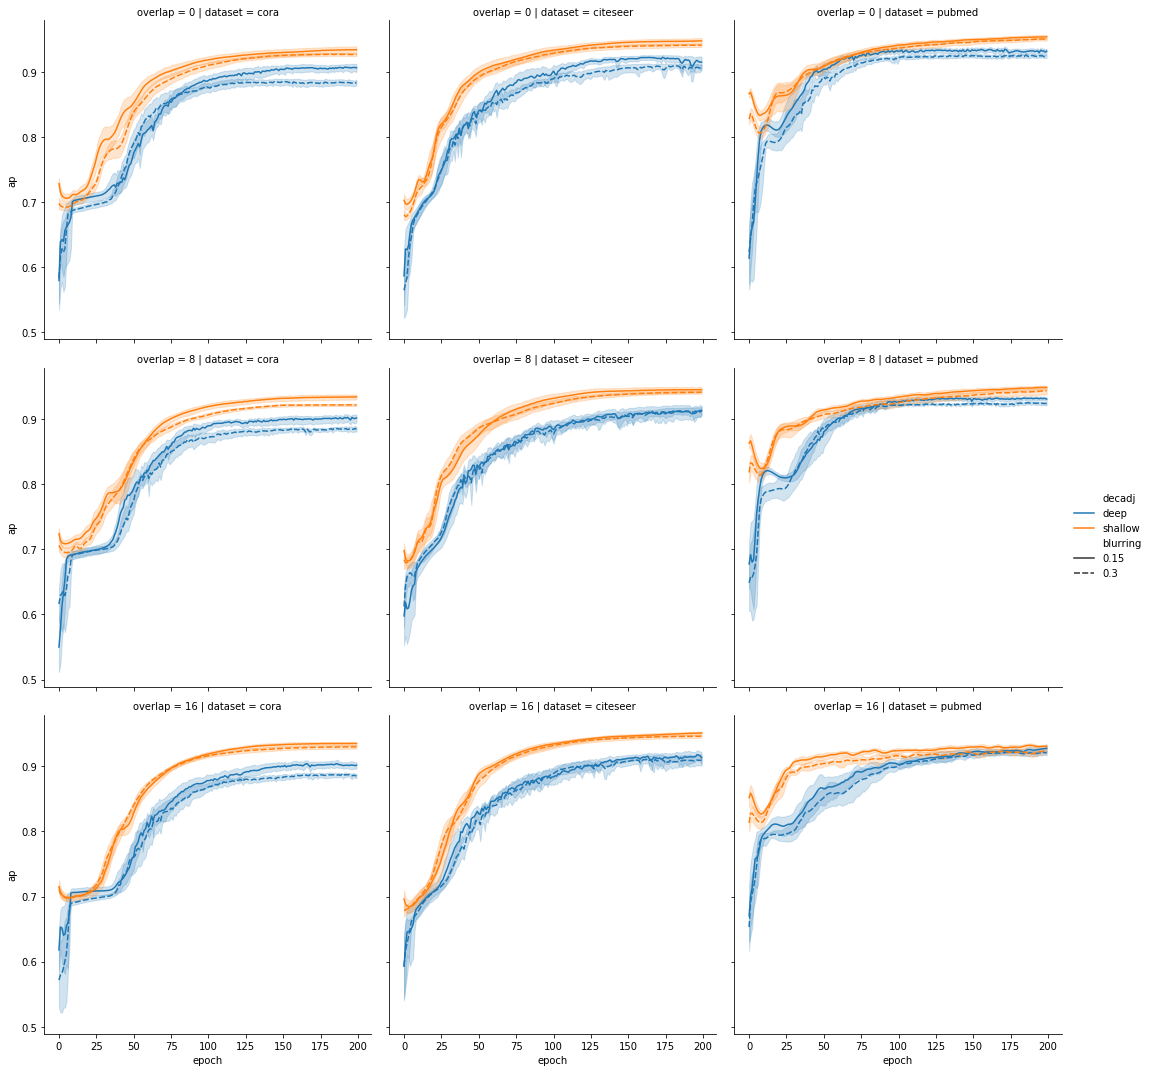

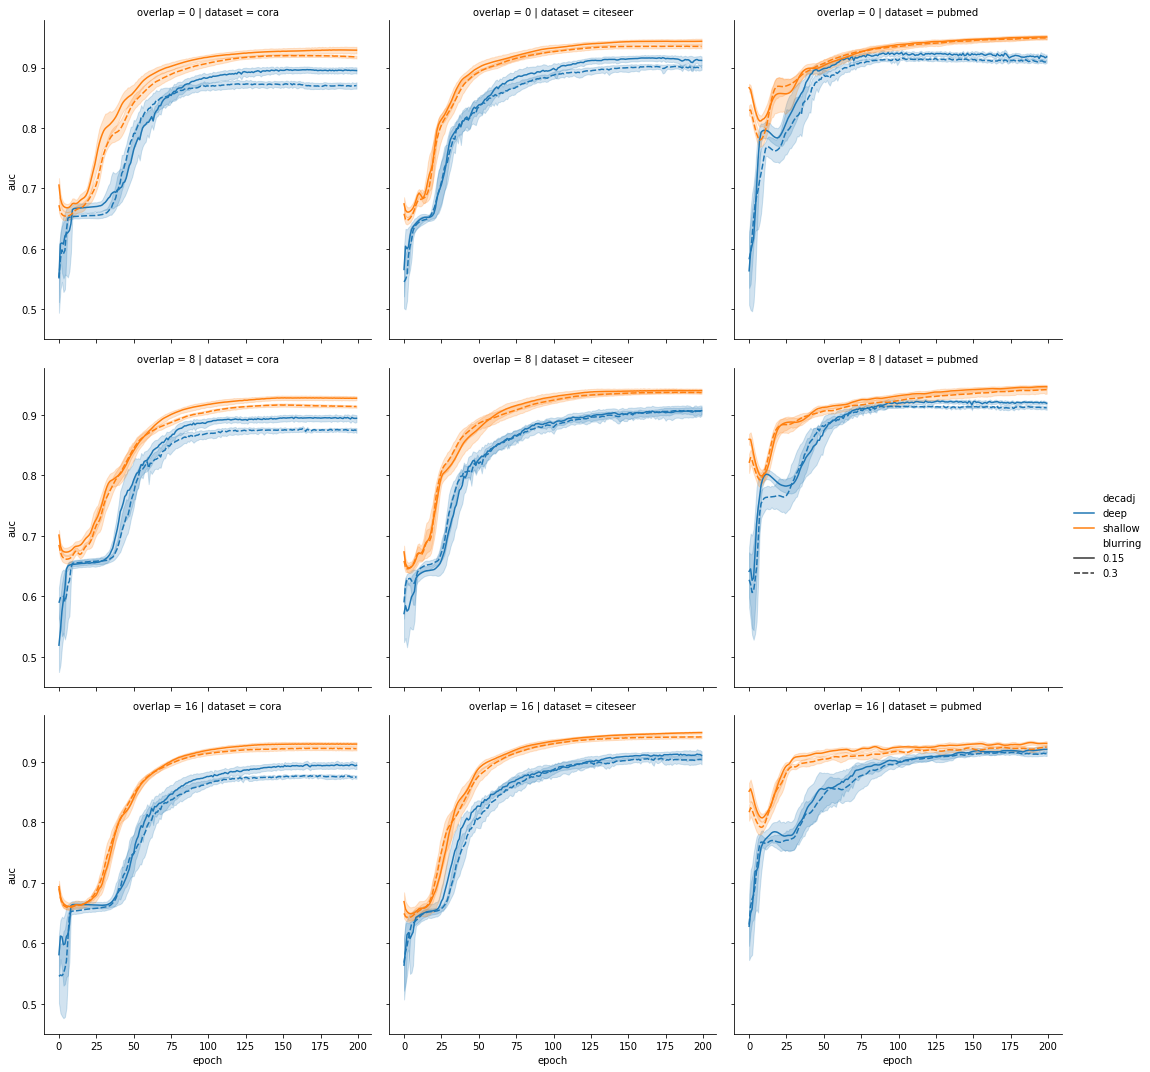

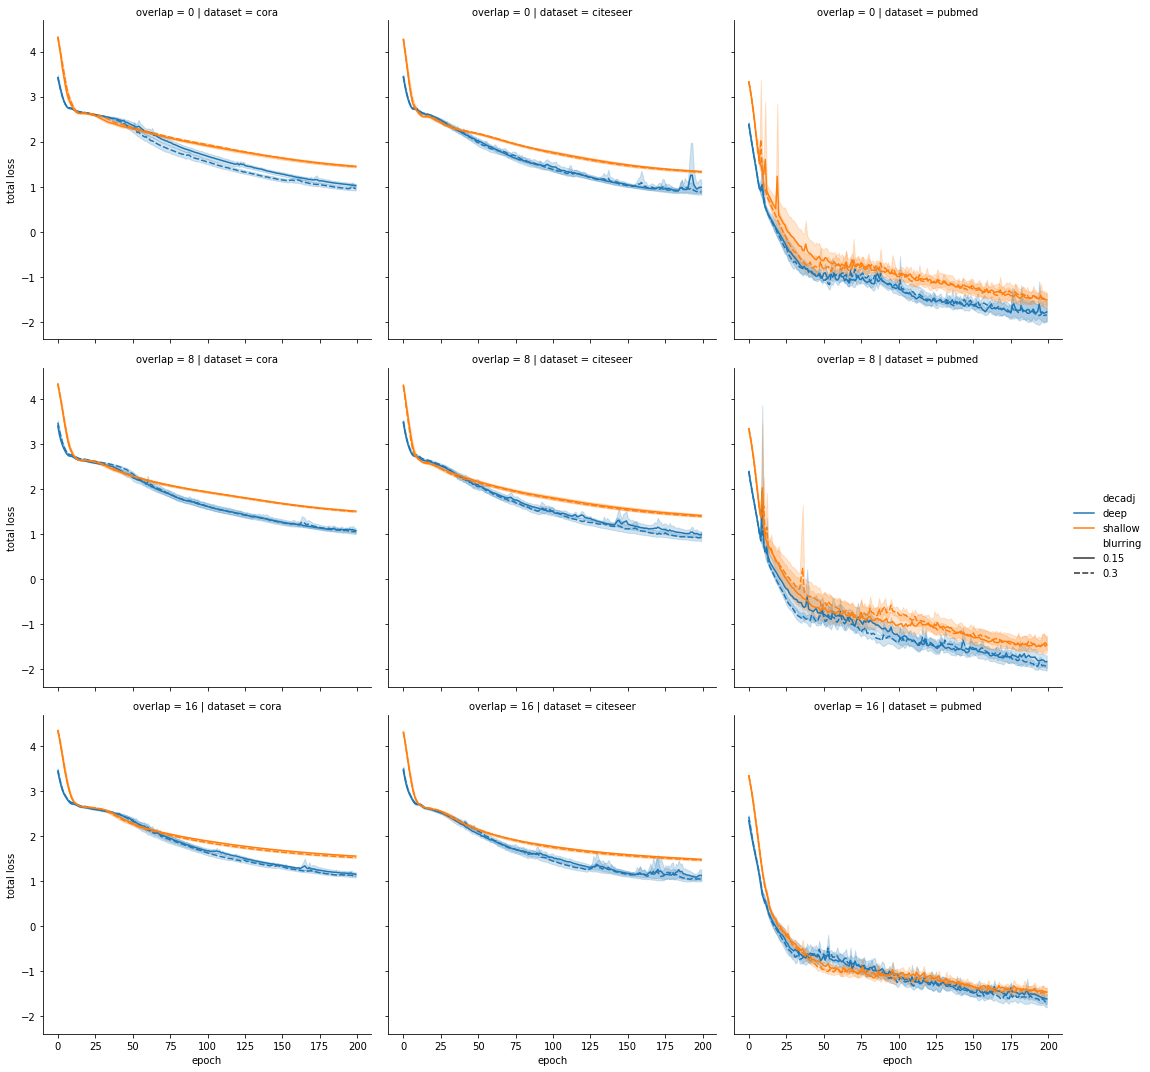

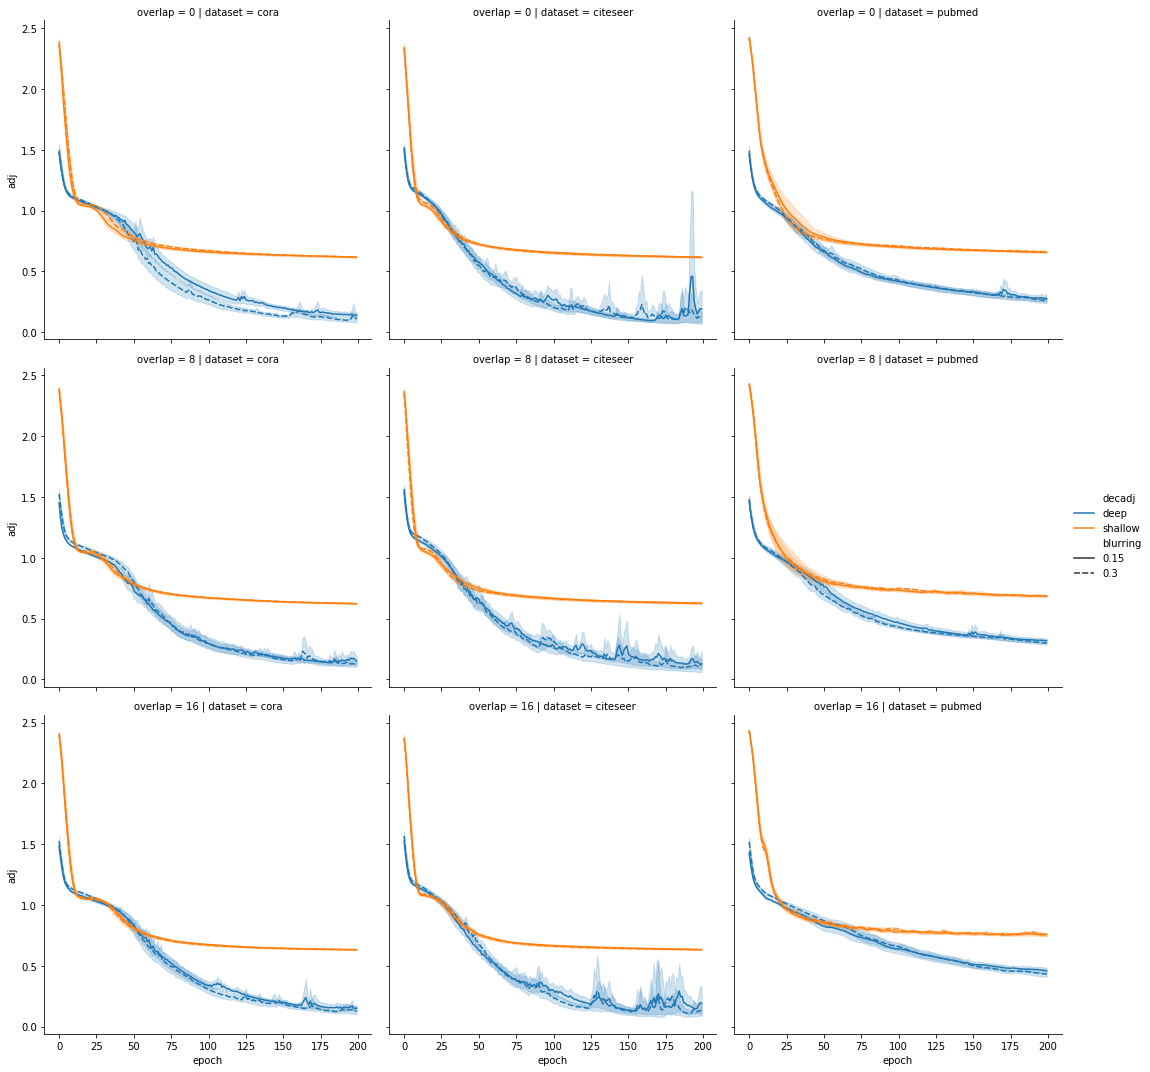

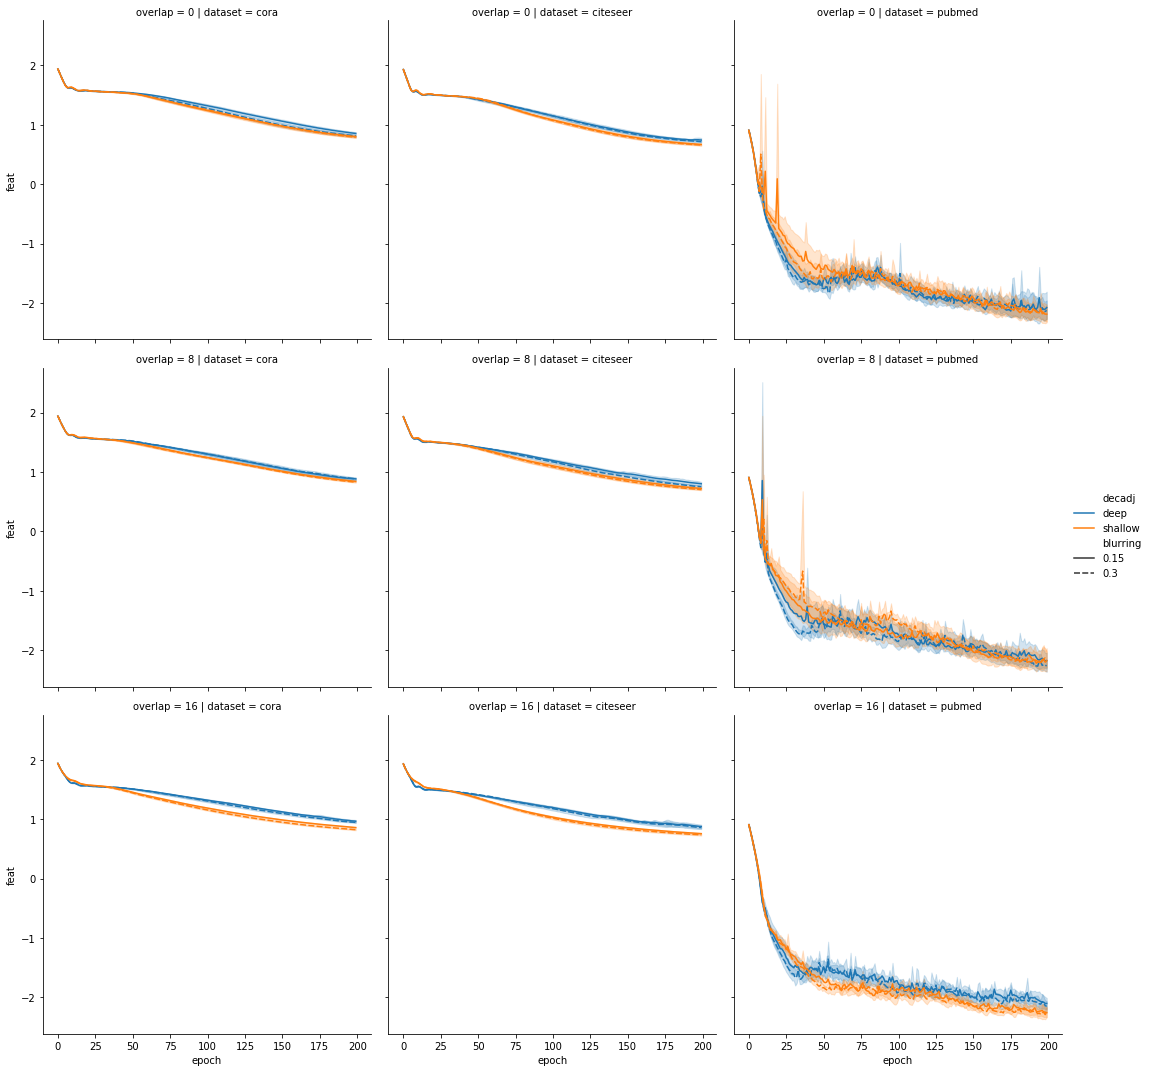

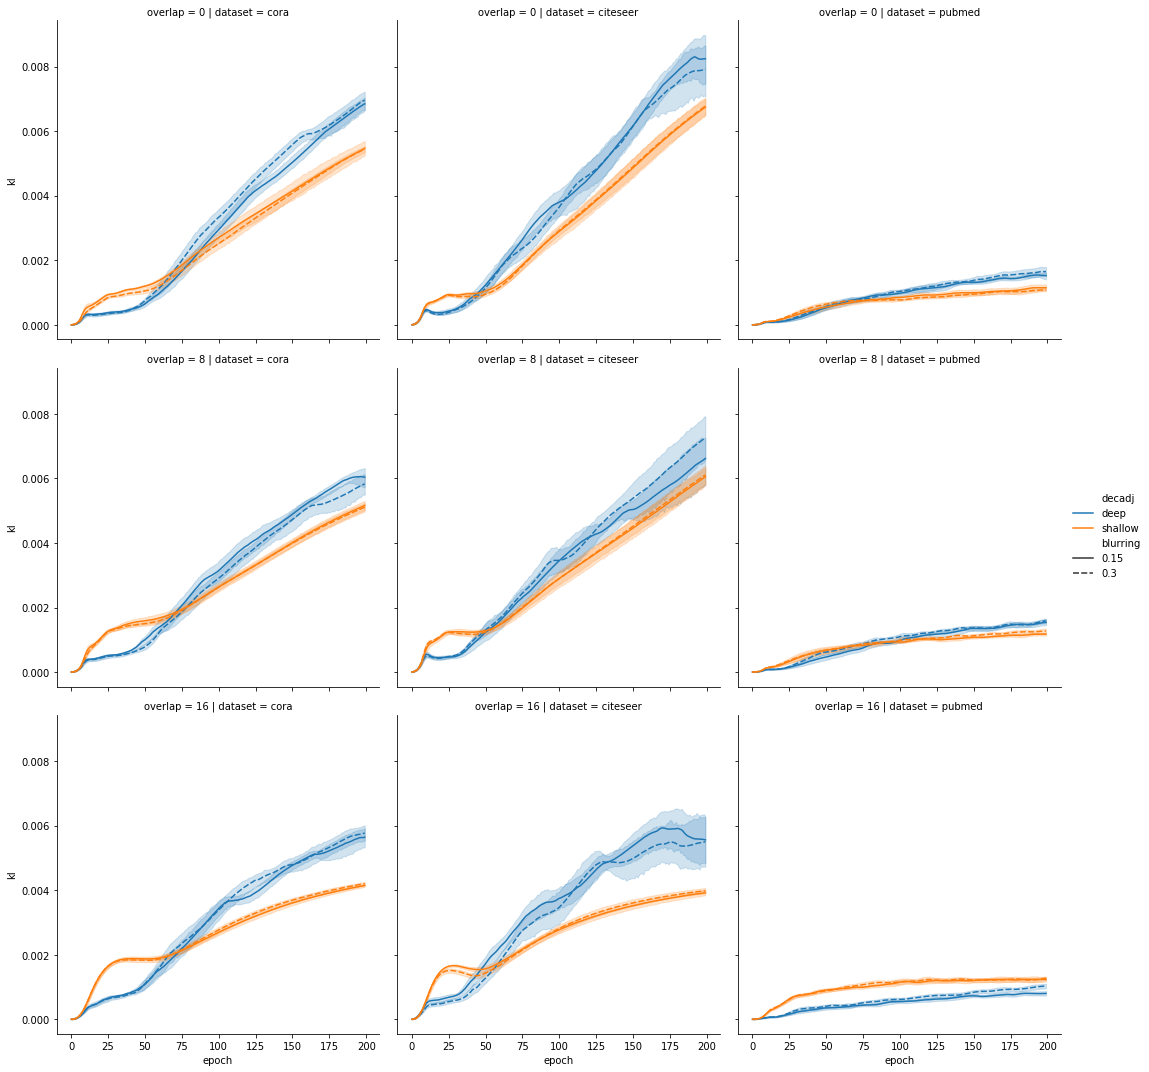

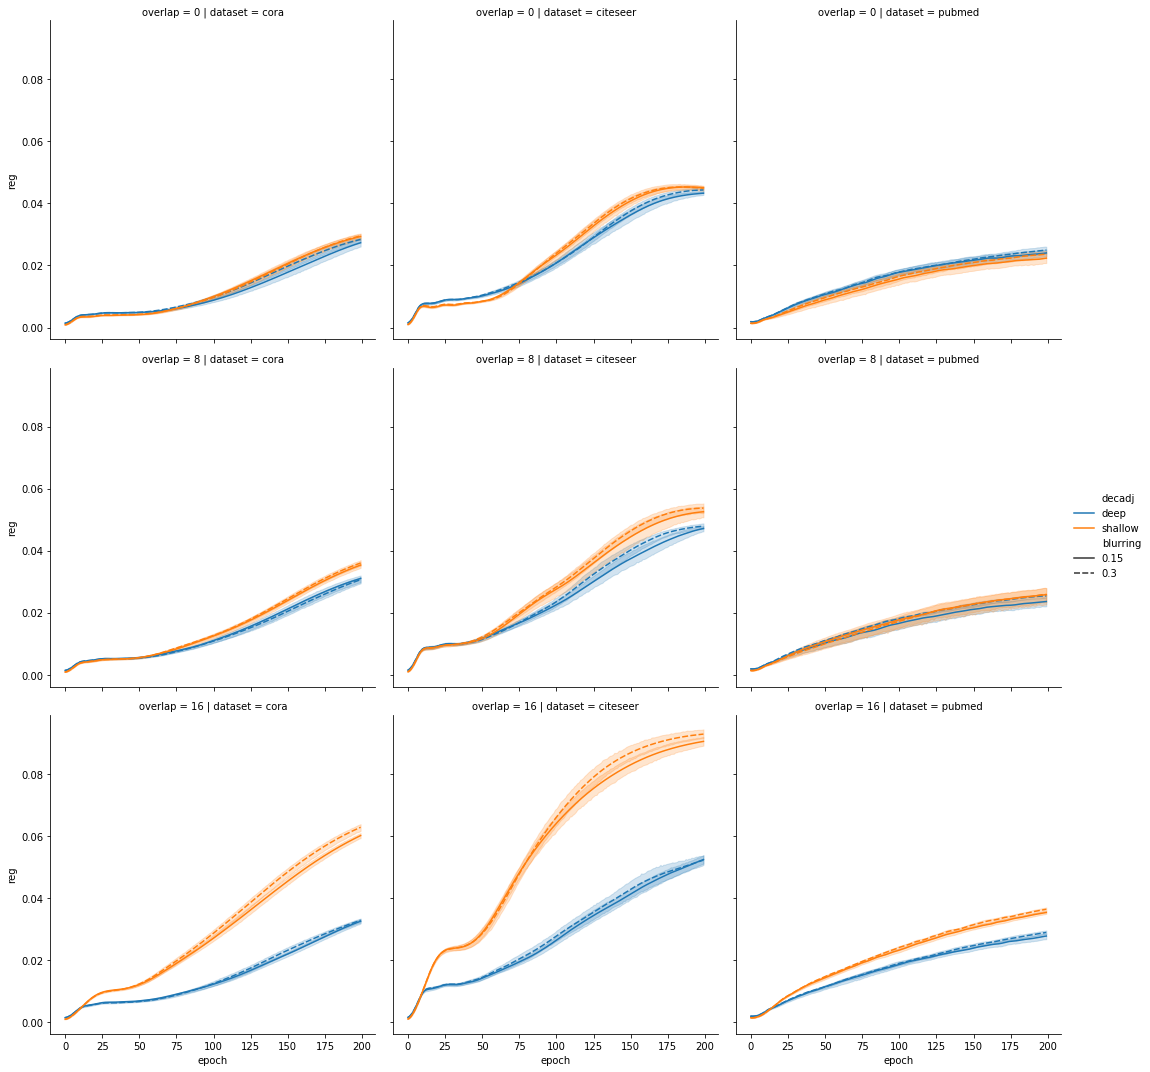

In [4]:
for var_name in ['ap', 'auc', 'total loss', 'adj', 'feat', 'kl', 'reg']:
    sb.relplot(x='epoch', y=var_name,
               style='blurring', style_order=[0.15, 0.30],
               hue='decadj', row='overlap',
               col='dataset', col_order=['cora', 'citeseer', 'pubmed'],
               data=results[(results.bias == 'no')
                            & (results.l1 == 'shared')],
               kind='line')

### Unshared l1

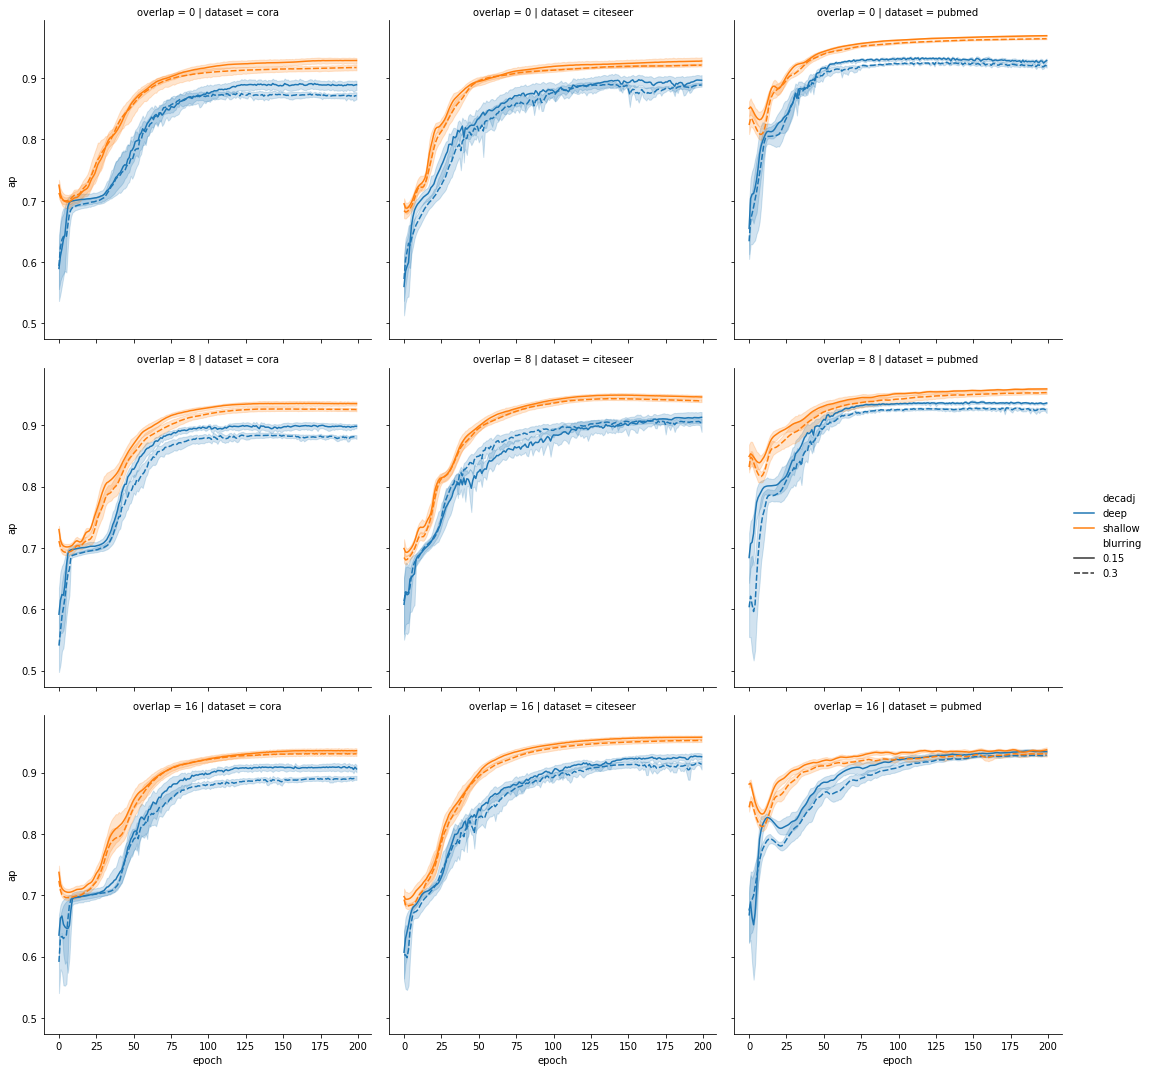

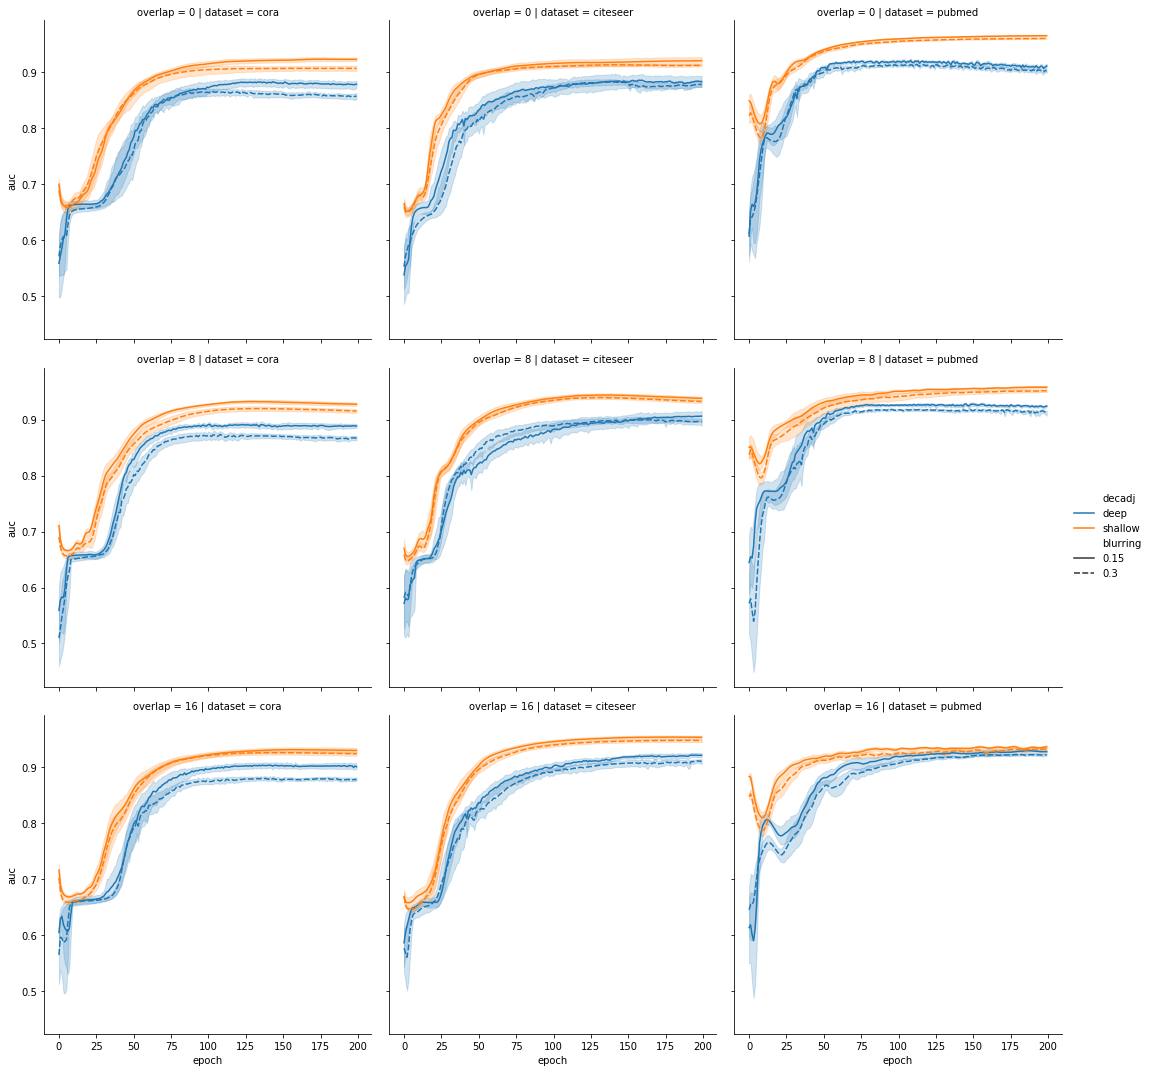

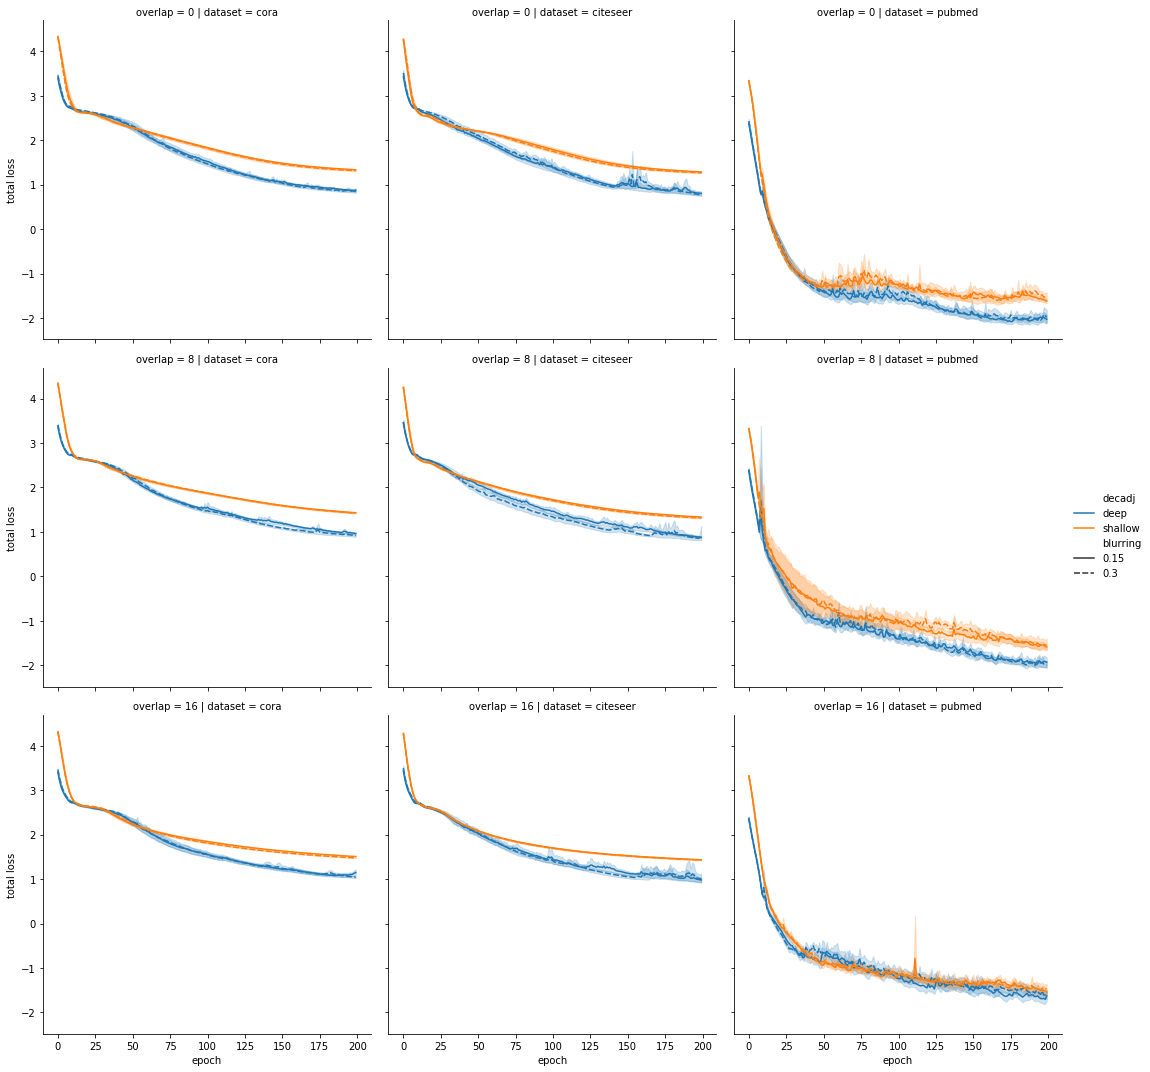

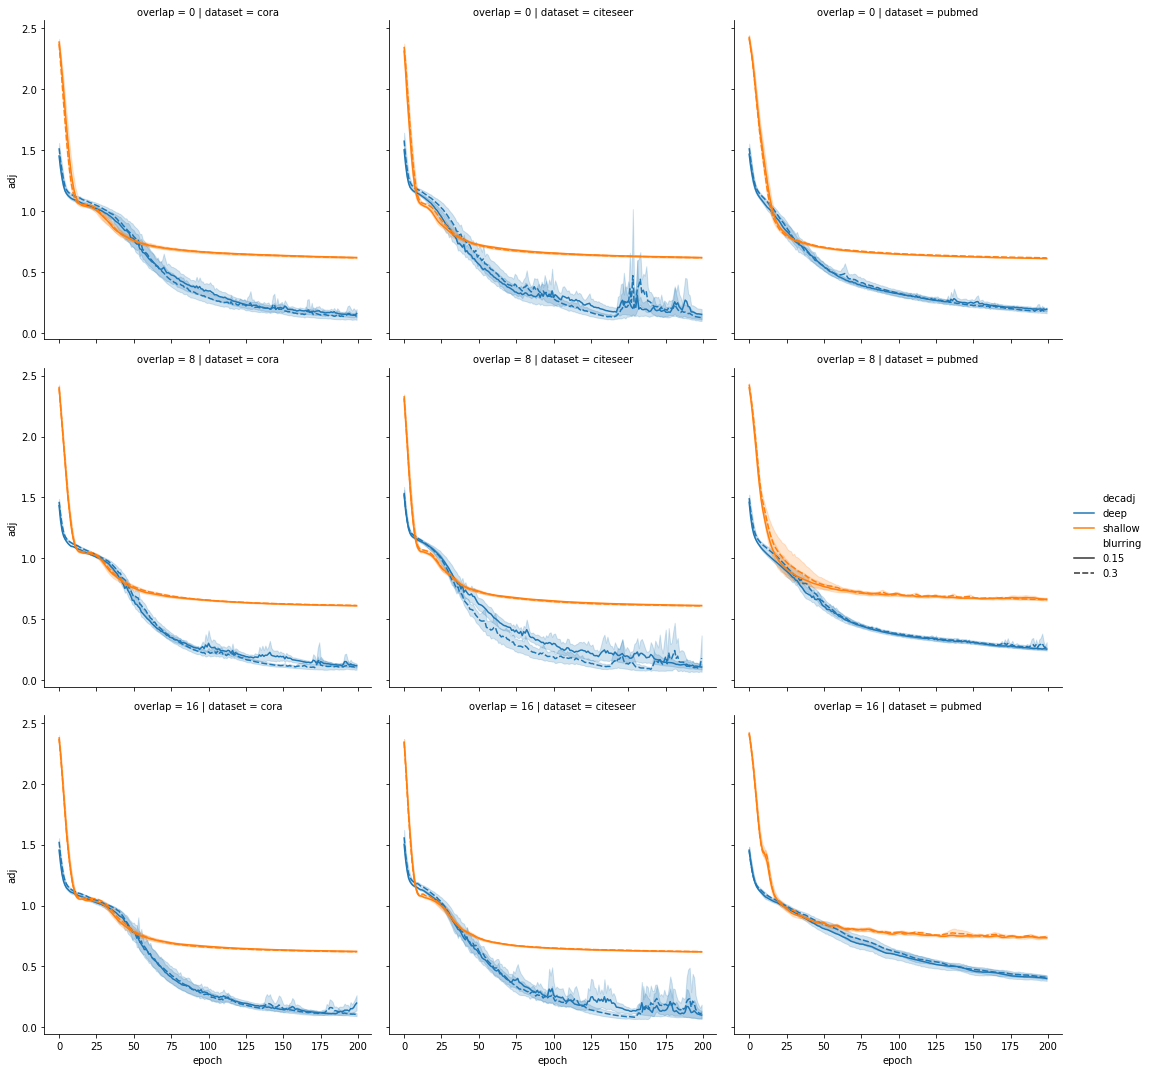

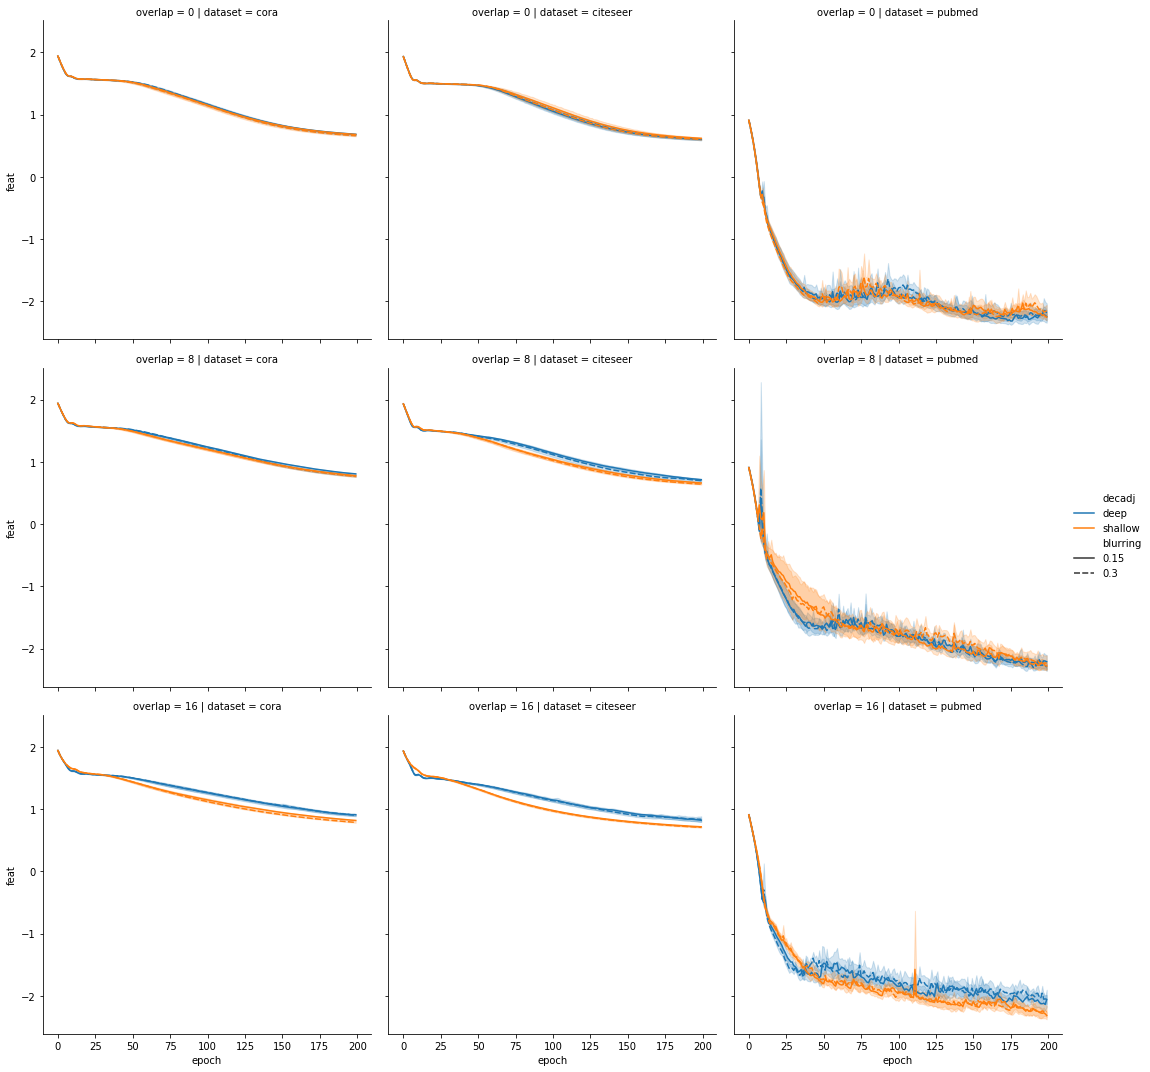

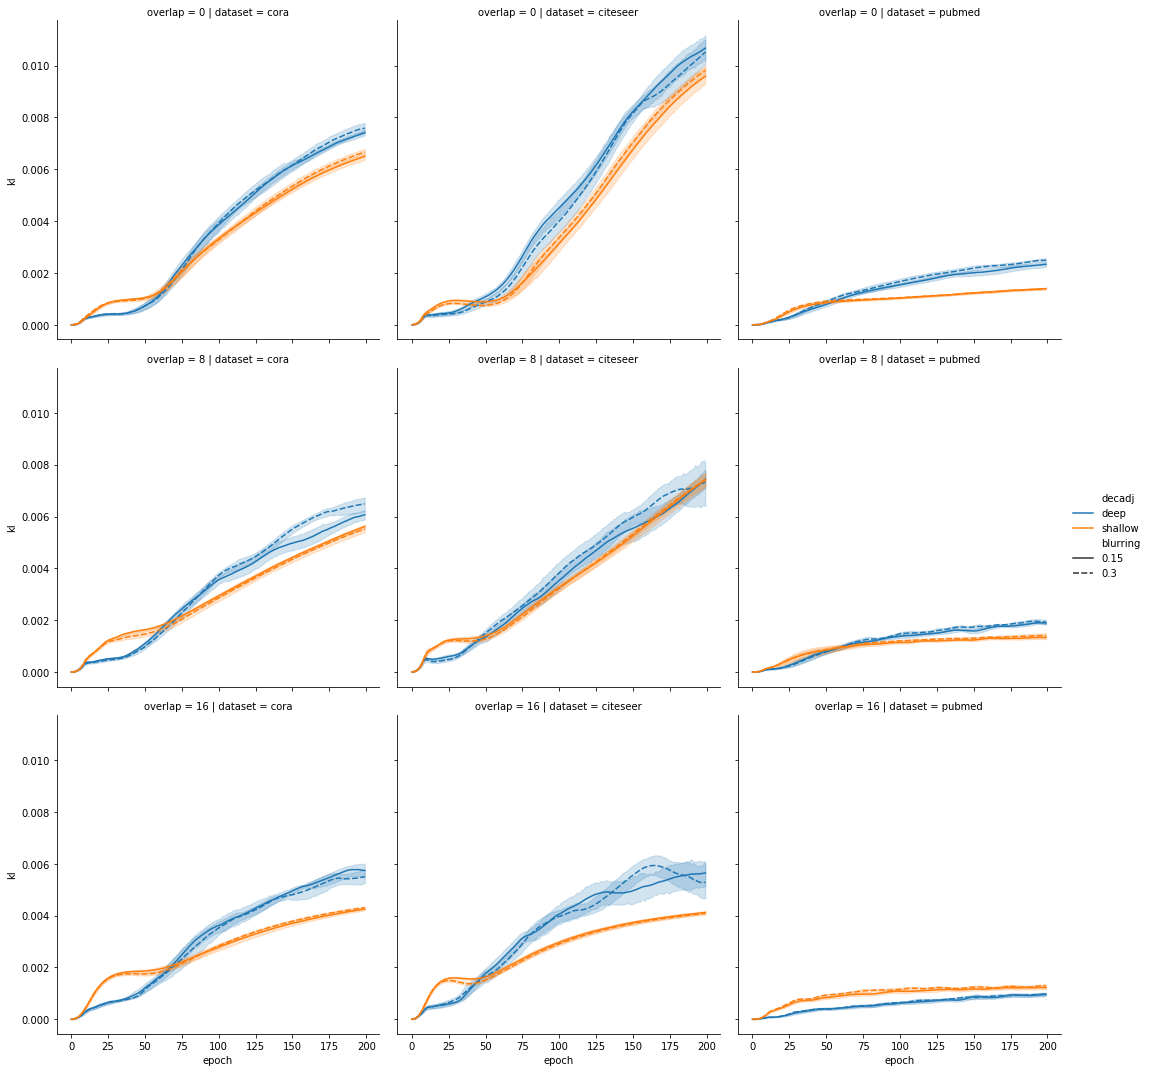

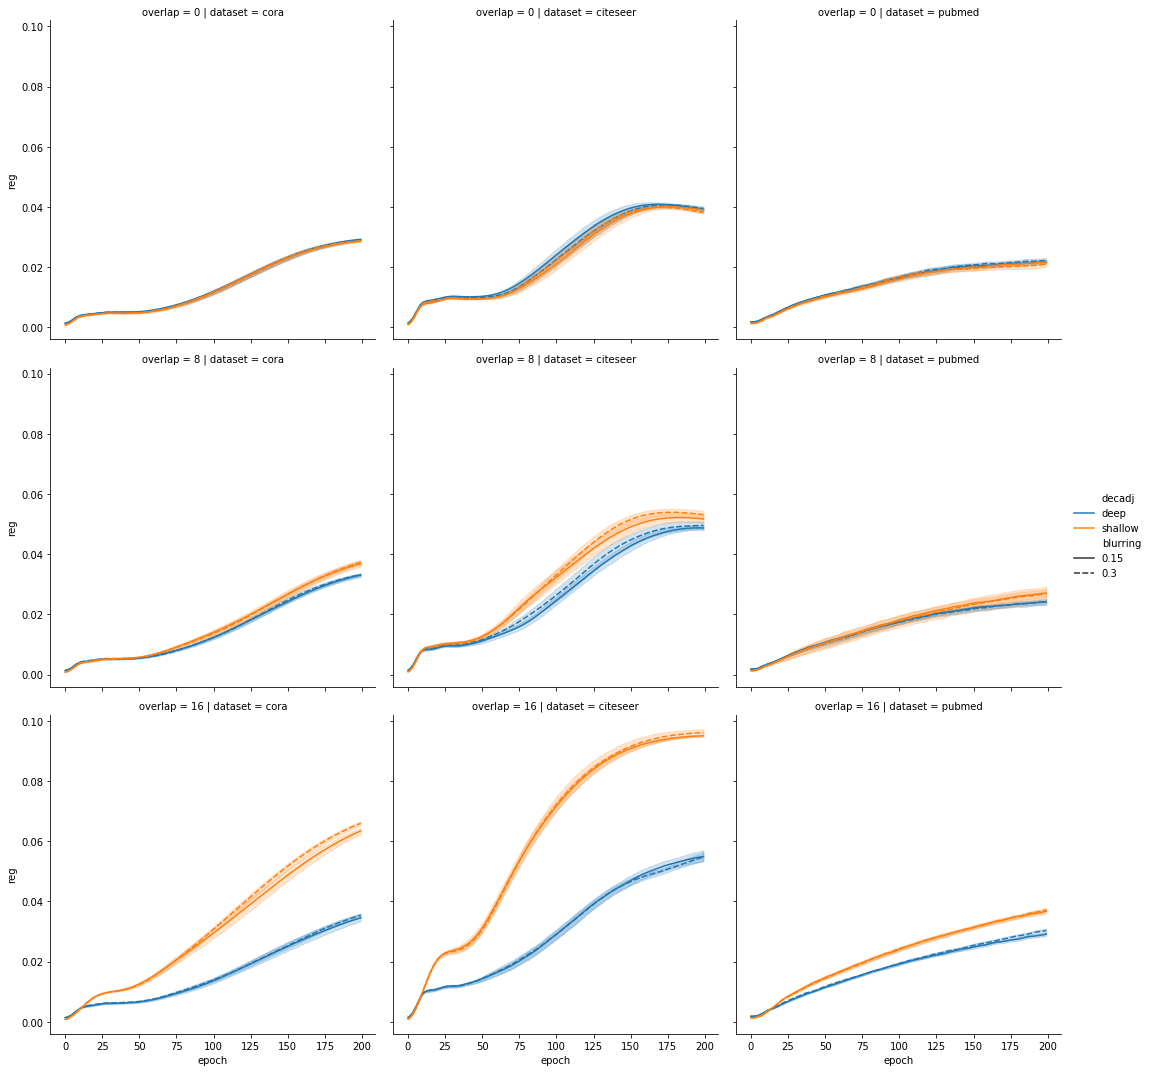

In [5]:
for var_name in ['ap', 'auc', 'total loss', 'adj', 'feat', 'kl', 'reg']:
    sb.relplot(x='epoch', y=var_name,
               style='blurring', style_order=[0.15, 0.30],
               hue='decadj', row='overlap',
               col='dataset', col_order=['cora', 'citeseer', 'pubmed'],
               data=results[(results.bias == 'no')
                            & (results.l1 == 'unshared')],
               kind='line')